<a href="https://colab.research.google.com/github/Kufzuk2/Comp_math/blob/main/sem2_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-13bbecfdc4bd>:29: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  y = spsolve(A, rhs)


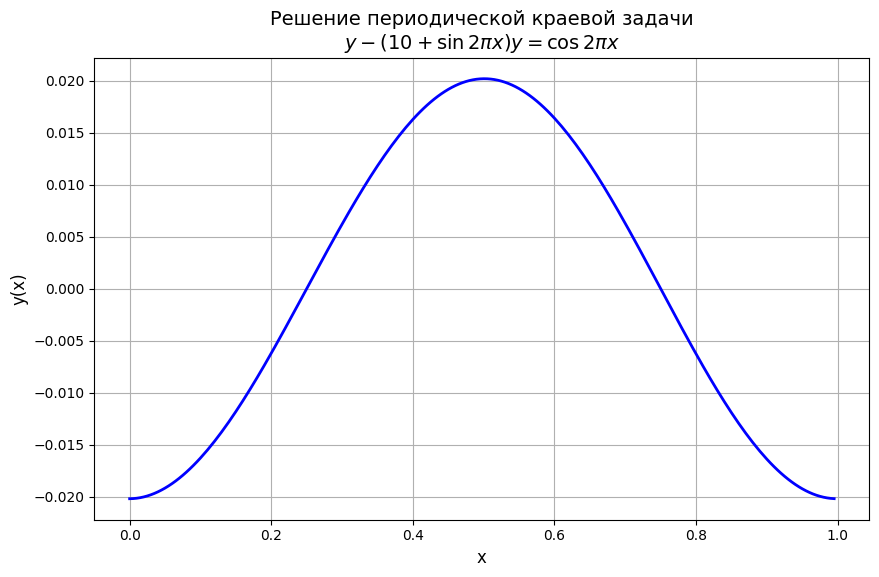

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def solve_periodic(h=0.005):
    # Параметры задачи
    N = int(1/h)
    x = np.linspace(0, 1, N, endpoint=False)

    # Коэффициенты уравнения
    P2 = 10 + np.sin(2*np.pi*x)
    f = np.cos(2*np.pi*x)

    # Построение матрицы (периодическая трехдиагональная)
    main_diag = -2 - h**2 * P2
    off_diag = np.ones(N-1)

    # Учет периодичности
    diagonals = [main_diag, off_diag, off_diag]
    A = diags(diagonals, [0, 1, -1], shape=(N, N)).toarray()
    A[0, N-1] = 1
    A[N-1, 0] = 1

    # Правая часть
    rhs = h**2 * f

    # Решение системы
    y = spsolve(A, rhs)

    return x, y

# Решение задачи
x, y = solve_periodic()

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y(x)', fontsize=12)
plt.title('Решение периодической краевой задачи\n'
          r'$y'' - (10 + \sin 2\pi x)y = \cos 2\pi x$', fontsize=14)
plt.grid(True)
plt.show()